In [2]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline


In [5]:
df = pd.read_csv('/sp500.csv')

In [6]:
df.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1950-01-03,16.66,16.66,16.66,16.66,1260000,0,0
1,1950-01-04,16.85,16.85,16.85,16.85,1890000,0,0
2,1950-01-05,16.93,16.93,16.93,16.93,2550000,0,0
3,1950-01-06,16.98,16.98,16.98,16.98,2010000,0,0
4,1950-01-09,17.08,17.08,17.08,17.08,2520000,0,0


In [7]:
df.drop(['Dividends', 'Stock Splits'], axis=1, inplace = True)

<Axes: >

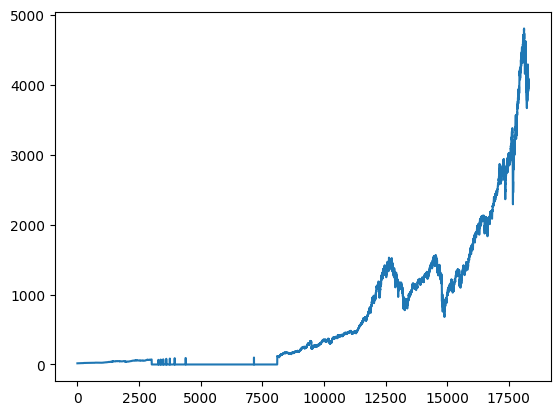

In [8]:
df["Open"].plot()


In [9]:
ma100 = df.Close.rolling(100).mean()
ma100

0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
            ...     
18287    4042.989614
18288    4038.322417
18289    4034.458318
18290    4031.215020
18291    4027.665718
Name: Close, Length: 18292, dtype: float64

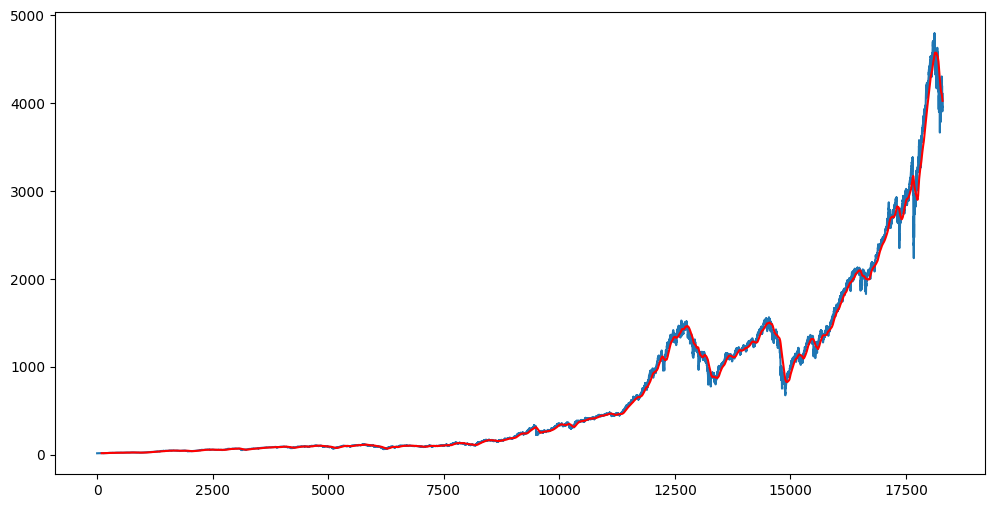

In [10]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,"r")


In [11]:
ma200 = df.Close.rolling(200).mean()
ma200

0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
            ...     
18287    4285.653660
18288    4282.030310
18289    4278.571410
18290    4275.493511
18291    4272.576409
Name: Close, Length: 18292, dtype: float64

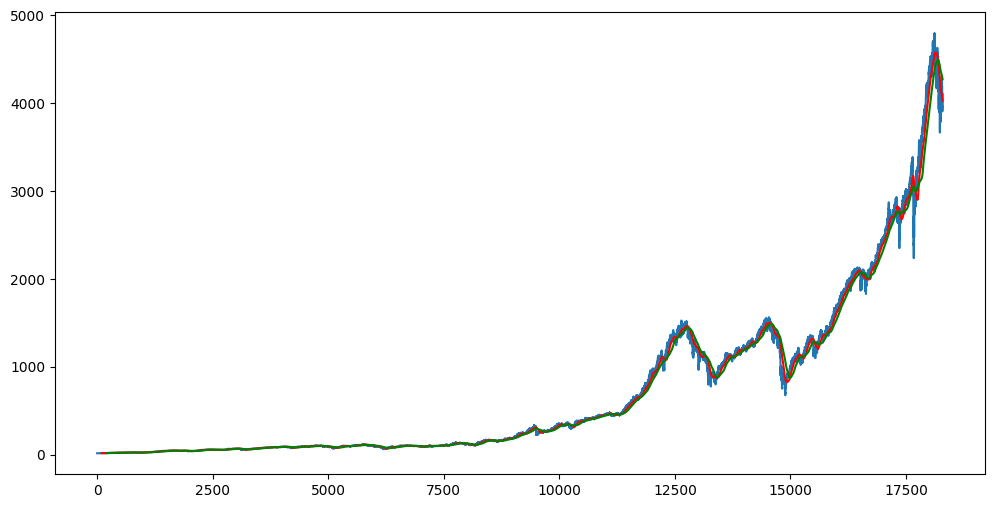

In [9]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,"r")
plt.plot(ma200,"g")

In [12]:
# splitting data into train and test sets

trainData = pd.DataFrame(df["Close"][0:int(len(df)*0.7)])
testData = pd.DataFrame(df["Close"][int(len(df)*0.7):int(len(df))])

In [13]:
print(trainData.shape)
print(testData.shape)

(12804, 1)
(5488, 1)


In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [15]:
trainData_array = scaler.fit_transform(trainData)
trainData_array

array([[0.00000000e+00],
       [1.25761543e-04],
       [1.78713572e-04],
       ...,
       [8.83373077e-01],
       [9.04348681e-01],
       [9.08889392e-01]])

In [16]:
xtrain = []
ytrain = []

for i in range(100, trainData_array.shape[0]):
    xtrain.append(trainData_array[i-100:i])
    ytrain.append(trainData_array[i,0])

xtrain, ytrain = np.array(xtrain), np.array(ytrain)

In [17]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [18]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (xtrain.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 50, activation = 'relu', return_sequences = True))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 100, 50)           2

In [20]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(xtrain, ytrain, epochs = 50)

Epoch 1/50
397/397 [==============================] - 65s 154ms/step - loss: 0.0441
Epoch 2/50
397/397 [==============================] - 62s 157ms/step - loss: 0.0432
Epoch 3/50
397/397 [==============================] - 61s 154ms/step - loss: 0.0431
Epoch 4/50
397/397 [==============================] - 61s 154ms/step - loss: 0.0431
Epoch 5/50
397/397 [==============================] - 62s 157ms/step - loss: 0.0430
Epoch 6/50
397/397 [==============================] - 62s 156ms/step - loss: 0.0430
Epoch 7/50
397/397 [==============================] - 62s 157ms/step - loss: 0.0430
Epoch 8/50
397/397 [==============================] - 64s 160ms/step - loss: 0.0430
Epoch 9/50
397/397 [==============================] - 62s 156ms/step - loss: 0.0430
Epoch 10/50
397/397 [==============================] - 62s 156ms/step - loss: 0.0430
Epoch 11/50
397/397 [==============================] - 63s 159ms/step - loss: 0.0430
Epoch 12/50
397/397 [==============================] - 62s 157ms/step - lo

In [21]:
testData.head()

,Close
12804,1372.319946
12805,1367.719971
12806,1342.619995
12807,1347.349976
12808,1322.359985


In [22]:
past_100_days = trainData.tail(100)
final_df = past_100_days.append(testData, ignore_index =True)

<ipython-input-22-5ad786055b9e>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(testData, ignore_index =True)


In [23]:
final_df.head()

,Close
0,1450.550049
1,1454.819946
2,1442.390015
3,1454.599976
4,1469.540039


In [24]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.18786757],
       [0.18890394],
       [0.18588699],
       ...,
       [0.80816156],
       [0.82301101],
       [0.83270018]])

In [38]:
xtest = []
ytest = []

for i in range(100, input_data.shape[0]):
    xtest.append(input_data[i-100:i])
    ytest.append(input_data[i,0])

xtest, ytest = np.array(xtest), np.array(ytest)

print(xtest.shape, ytest.shape)

(5488, 100, 1) (5488,)


In [39]:
ypredicted = model.predict(xtest)
ypredicted.shape

172/172 [==============================] - 8s 49ms/step


(5488, 100, 1)

In [40]:
ytest

array([0.16887982, 0.16776333, 0.16167114, ..., 0.80816156, 0.82301101,
       0.83270018])

In [41]:
scaler.scale_

array([0.00024272])

In [42]:
scale_factor = 1/0.02099517
ypredicted = ypredicted*scale_factor
ytest = ytest * scale_factor

In [44]:
ypredicted = ypredicted.reshape(-1,)

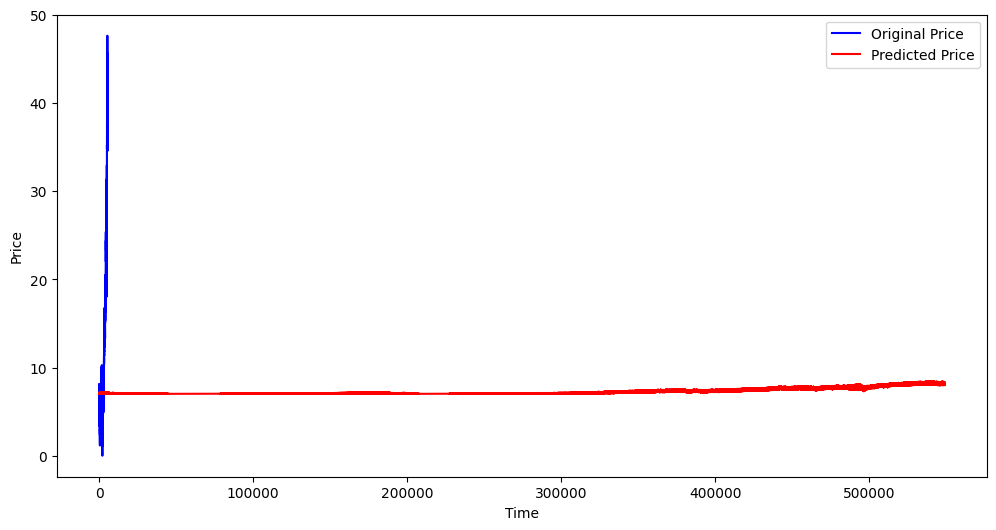

In [45]:
plt.figure(figsize = (12,6))
plt.plot(ytest, 'b', label = 'Original Price')
plt.plot(ypredicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()